#  Bayesian Inference: Estimating mean of a normal distributed random variable 


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interactive 
from scipy.stats import norm 
import math

# Prevents the pop-up graphs in a separate window.
#get_ipython().run_line_magic('matplotlib', 'inline')

    
def BayesianInference(mu, muEstimate, sd, sample=0):

    # Graph from 0 to 100, include 10000 points.
    x = np.linspace( -10 , 10,  10000) 
    
    tempsd = sd
    tempMu = muEstimate
    
    for i in range(0,sample):
        y  = np.random.normal(mu,sd)
        t0 = 1/(tempsd**2)
        t = 1/(sd**2)
        tempMu = ( (y*t +  t0*tempMu) / (t+t0) )
        tempsd = math.sqrt( 1/(t+t0) )
    
    plt.plot(x, norm.pdf(x, tempMu, tempsd),label ="Estimate of mu")
    plt.plot(x, norm.pdf(x, mu, sd),label ="Original Distribution")
    

    plt.grid()
    plt.legend()
    plt.title("Estimate mean of a normal distribution")
    plt.xlabel("x")
    plt.ylabel("f(x)")

interactive_plot = interactive(BayesianInference, mu=(0.35,1,0.01), muEstimate=(-5,6,0.3), sample = (0,30,1), sd = (1,4,0.2))
interactive_plot

interactive(children=(FloatSlider(value=0.6699999999999999, description='mu', max=1.0, min=0.35, step=0.01), F…

# Bayesian Inference: Estimating probability of success of a binomial distributed random variable 


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interactive 
from scipy.stats import norm, beta
import math

# Prevents the pop-up graphs in a separate window.
#get_ipython().run_line_magic('matplotlib', 'inline')

    
def BinomialInference(n=5, p=0.2, a=3, b=5, sample=0):

    # Graph from 0 to 100, include 10000 points.
    x = np.linspace( 0, 1,  1000) 
    
    
    
    for i in range(0,sample):
        y  = np.random.binomial(n,p)
        a = a + y
        b = b + n - y
        
    
    plt.plot(x, beta.pdf(x, a, b),label ="Estimate of p")
    plt.axvline(x = p, color = 'b', label = 'true p value')

    plt.grid()
    plt.legend()
    plt.title("Estimate p of a binomial distribution")
    plt.xlabel("p")
    plt.ylabel("f(p)")

interactive_plot = interactive(BinomialInference, n=(0,10,1), p=(0,1,0.01), sample = (0,100,1), a = (0,10, 0.2), b = (0,10, 0.2))
interactive_plot

interactive(children=(IntSlider(value=5, description='n', max=10), FloatSlider(value=0.2, description='p', max…

# Dynamic Linear Kalman Filter Testing 

Assume we have the constant Gaussian DLM. $\theta_k$~N($\theta$;$\mu,\sigma^2$), $u_k$=u~N(u;0,1), $v_k$=v~N(v;0,1)

Parameter at time k: $\theta_k$ = $1.1\theta_{k-1}$ + $u_k$ <br>
Observation at time k: $y_k$ = $2\theta_{k}$ + $v_k$ <br>
True Position at time k: $2\theta_{k}$ <br>

Thus

- F = 1.1
- H = 2



In [4]:
x = np.linspace(0,33,33)


TransitionMatrix = 1.1
TransitionNoiseVariance= 4

ObservationMatrix = 2
ObservationNoiseVariance = 4

#Prepare some data
TrueTheta = 3
TruePositions = []
TrueThetas = []
ThetaK = TrueTheta

for i in range(0,len(x)):
    ThetaK = TransitionMatrix*ThetaK + np.random.normal(0,TransitionNoiseVariance)
    ObservationK = ObservationMatrix*ThetaK + np.random.normal(0,ObservationNoiseVariance)
    TruePositions.append(ObservationK)
    TrueThetas.append(ThetaK)


    
#--------------


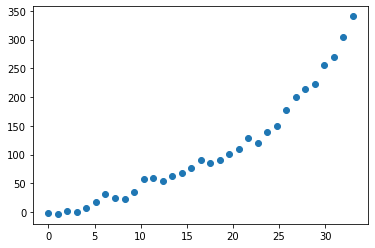

In [5]:
plt.scatter(x, TruePositions)

In [6]:

PriorThetaMean = 4
PriorThetaVariance = 3



ThetaMean = PriorThetaMean
ThetaVar = PriorThetaVariance
PositionPrediction = []



ThetasPredictedMean = []
ThetasPredictedVar = []
ThetasPosteriorMean = []
ThetasPosteriorVar = []


for i in range(0,len(x)):
    PredictionThetaMean = TransitionMatrix*ThetaMean
    PredictionThetaVariance = (TransitionMatrix**2)*ThetaVar + TransitionNoiseVariance
    
    ThetasPredictedMean.append(PredictionThetaMean)
    ThetasPredictedVar.append(PredictionThetaVariance)
    PositionPrediction.append(ObservationMatrix*PredictionThetaMean)

    
    CovarianceOfInnovation = (ObservationMatrix**2)*PredictionThetaVariance + ObservationNoiseVariance
    OptimalKalmanGain = ( PredictionThetaVariance * ObservationMatrix ) / CovarianceOfInnovation
    Innovation = TruePositions[i] - ( ObservationMatrix*PredictionThetaMean )
    
    ThetaMean = PredictionThetaMean + (OptimalKalmanGain*Innovation)
    ThetaVar = (1-(OptimalKalmanGain*ObservationMatrix)) * PredictionThetaVariance
    
    ThetasPosteriorMean.append(ThetaMean)
    ThetasPosteriorVar.append(ThetaVar)
    

In [7]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()
p = figure(title="Constant Gaussian DLM", x_axis_label="TimeStep", y_axis_label="Position")

p.circle(x, PositionPrediction, legend_label="Positions Predicted", color="green", size=8)
p.circle(x, TruePositions, legend_label="Observed Positions", color="red", size=8)


show(p)


Loading BokehJS ...

In [8]:
def EstimateofTheta(Timestep = 0):
    
    # Graph from 0 to 100, include 10000 points.
    x = np.linspace( -10 ,40,  100000) 
    
    
    plt.plot(x, norm.pdf(x, ThetasPredictedMean[Timestep], ThetasPredictedVar[Timestep]),label ="Distribution of predicted mu")
    plt.plot(x, norm.pdf(x, ThetasPosteriorMean[Timestep], ThetasPosteriorVar[Timestep]),label ="Distribution of posterior mu")

    plt.axvline(x = TrueThetas[Timestep], color = 'b', label = 'theta k')

    plt.grid()
    plt.legend()
    plt.title("Estimate of theta k")
    plt.xlabel("x")
    plt.ylabel("f(x)")


    
interactive_plot = interactive(EstimateofTheta, Timestep = (0,30,1) )
interactive_plot

interactive(children=(IntSlider(value=0, description='Timestep', max=30), Output()), _dom_classes=('widget-int…

# General Kalman Filter 

In [158]:
def PredictedAndPosterior( Observations, priorThetaMean, priorThetaVariance,transitionMatrix, transitionNoiseVariance, observationMatrix, observationNoiseVariance):
    ObservationPrediction = []
    ThetasPredictedMean = []
    ThetasPredictedVar = []
    ThetasPosteriorMean = []
    ThetasPosteriorVar = []
    
    ThetaMean= priorThetaMean
    ThetaVar = priorThetaVariance
    
    for i in range(0,len(Observations)):
        PredictionThetaMean = np.matmul(transitionMatrix,ThetaMean)
        PredictionThetaVariance = np.matmul( np.matmul(transitionMatrix,transitionMatrix.T),ThetaVar ) + transitionNoiseVariance
        
        ThetasPredictedMean.append(PredictionThetaMean)
        ThetasPredictedVar.append(PredictionThetaVariance)
        ObservationPrediction.append(np.matmul( observationMatrix, PredictionThetaMean) )
     
        CovarianceOfInnovation = np.matmul( np.matmul(observationMatrix,PredictionThetaVariance), observationMatrix.T)+ observationNoiseVariance
        OptimalKalmanGain = np.matmul( np.matmul(PredictionThetaVariance,observationMatrix.T),np.linalg.inv(CovarianceOfInnovation) )
        Innovation = Observations[i] - np.matmul( observationMatrix,PredictionThetaMean )
        
        ThetaMean = PredictionThetaMean + np.matmul(OptimalKalmanGain,Innovation.T).T.flatten()
        
        ThetaVar = np.matmul((np.identity(transitionMatrix.shape[0])-np.matmul( OptimalKalmanGain,observationMatrix)) , PredictionThetaVariance)
        
        ThetasPosteriorMean.append(ThetaMean)
        ThetasPosteriorVar.append(ThetaVar)
    
    return ObservationPrediction ,ThetasPredictedMean , ThetasPredictedVar,ThetasPosteriorMean, ThetasPosteriorVar 
    

In [159]:
def GenerateSample(trueTheta,transitionMatrix, transitionNoiseVariance, observationMatrix, observationNoiseVariance, number):
    
   
    Observations = []
    TrueThetas = []
    ThetaK = trueTheta
    MeanO = [0] * observationNoiseVariance.shape[0]
    MeanT= [0] * transitionNoiseVariance.shape[0]
    
    for i in range(0,number):
        ThetaK = np.matmul(transitionMatrix, ThetaK) + np.random.default_rng().multivariate_normal(MeanT,transitionNoiseVariance,1)
        ThetaK = ThetaK.flatten()
       
        ObservationK = np.matmul(observationMatrix, ThetaK) + np.random.default_rng().multivariate_normal(MeanO,observationNoiseVariance,1)
        Observations.append(ObservationK)
        ObservationK = ObservationK.flatten()
        TrueThetas.append(ThetaK)
    return TrueThetas, Observations

In [160]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from ipywidgets import interactive 

output_notebook()

def GeneralKalmanFilter( trueTheta, transitionMatrix, transitionNoiseVariance, observationMatrix, observationNoiseVariance, priorThetaMean, priorThetaVariance,number):

    #simulat some data
    TrueThetas, Observations = GenerateSample(trueTheta,transitionMatrix, transitionNoiseVariance, observationMatrix, observationNoiseVariance, number)
    
    #Calculate predicted theta for each time step as well as the posterior
    ObservationPrediction ,ThetasPredictedMean ,ThetasPredictedVar,ThetasPosteriorMean, ThetasPosteriorVar = PredictedAndPosterior( Observations, priorThetaMean, priorThetaVariance,transitionMatrix, transitionNoiseVariance, observationMatrix, observationNoiseVariance)
    return TrueThetas, Observations, ObservationPrediction ,ThetasPredictedMean , ThetasPredictedVar,ThetasPosteriorMean, ThetasPosteriorVar
    
    
    

Loading BokehJS ...

# Visualising Kalamn Filter in 1D 

In [26]:

TrueThetas, Observations, ObservationPrediction ,ThetasPredictedMean , ThetasPredictedVar,ThetasPosteriorMean, ThetasPosteriorVar=GeneralKalmanFilter(
    #True Theta
    np.full((1,1), 2),
    #Transition Matrix
    np.full((1,1), 1.1),
    #TransitionNoiseVariance
    np.full((1,1), 1),
    #Observation Matrix
    np.full((1,1), 2),
    #ObservationNoiseVariance
    np.full((1,1), 1),
    #priorTheta Mean
    np.full((1,1), 3),
    #priorTheta Variance
    np.full((1,1), 2),
    #number of observations
    33              
)



In [17]:
# Plot predictions against observations
yObs = np.concatenate( Observations, axis=0 )
yObs =  [int(item[0]) for item in yObs]

yPred= np.concatenate( ObservationPrediction, axis=0 )
yPred =  [int(item[0]) for item in yPred]

x = np.linspace( 0 ,len(yPred),  len(yPred)) 
p = figure(title="Gaussian DLM", x_axis_label="TimeStep", y_axis_label="Position (ie yk)")
p.circle(x, yPred, legend_label="Positions Predicted", color="green", size=8)
p.circle(x, yObs, legend_label="Observed Positions", color="red", size=8)
show(p) 


In [18]:
#Plotting distribution of posterior and predicted mu along time
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interactive 
from scipy.stats import norm 
import math

ThetasPredictedMean = np.concatenate( ThetasPredictedMean, axis=0 )
ThetasPredictedMean =  [float(item[0]) for item in ThetasPredictedMean] 

ThetasPredictedVar = np.concatenate( ThetasPredictedVar, axis=0 )
ThetasPredictedVar =  [float(item[0]) for item in ThetasPredictedVar] 

ThetasPosteriorMean = np.concatenate( ThetasPosteriorMean, axis=0 )
ThetasPosteriorMean =  [float(item[0]) for item in ThetasPosteriorMean] 

ThetasPosteriorVar = np.concatenate( ThetasPosteriorVar, axis=0 )
ThetasPosteriorVar =  [float(item[0]) for item in ThetasPosteriorVar] 
    


In [20]:
def EstimateofTheta(Timestep = 0):
    
    # Graph from 0 to 100, include 10000 points.
    x = np.linspace( -40 ,40,  100000) 
    
    
    plt.plot(x, norm.pdf(x, ThetasPredictedMean[Timestep], ThetasPredictedVar[Timestep]),label ="Distribution of predicted mu")
    plt.plot(x, norm.pdf(x, ThetasPosteriorMean[Timestep], ThetasPosteriorVar[Timestep]),label ="Distribution of posterior mu")

    plt.axvline(x = TrueThetas[Timestep], color = 'b', label = 'theta k')

    plt.grid()
    plt.legend()
    plt.title("Estimate of theta k")
    plt.xlabel("x")
    plt.ylabel("f(x)")


    
interactive_plot = interactive(EstimateofTheta, Timestep = (0,30,1) )
interactive_plot

interactive(children=(IntSlider(value=0, description='Timestep', max=30), Output()), _dom_classes=('widget-int…

# Properties of Signatures 

In [ ]:

import iisignature 
import numpy as np
path = np.random.uniform(size=(50,3)) 
signature = iisignature.sig(path ,4)
s = iisignature.prepare(3,4)
logsignature = iisignature.logsig(path,s)

In [ ]:
from PIL import ImageTk, Image, ImageDraw
import PIL
import numpy as np
from tkinter import *
import random
import csv
width = 200  # canvas width
height = 200 # canvas height
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    fileName= random.randint(1, 2000)
    output_image.save("2.jpg")
    temp = "/Users/ambarjin/Desktop/Y4 Data Sci/Dissertation/NumberData/Training/3/" +str(fileName)+".npy"
    x=np.array(Coordinnates)
    np.save(temp, x)
      
    print(Coordinnates)
    Coordinnates.clear()
    

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    Coordinnates.append( [x1, y1])
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=55)
    draw.line([x1, y1, x2, y2],fill="black",width=55)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()
Coordinnates =[]
# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

In [4]:
j=np.load("/Users/ambarjin/Desktop/Y4 Data Sci/Dissertation/NumberData/Training/8/" +str(749)+".npy")
j

array([[100,  95],
       [ 97,  95],
       [ 92,  95],
       [ 73,  95],
       [ 54,  95],
       [ 38,  95],
       [ 24,  95],
       [ 16,  95],
       [ 10,  95],
       [  8,  96]])

# Estimating Transition Matrix of Kalman Filter using Signatures (1D scenario with lag)

In [194]:
def LeadLag(path,lagging =1):
    if lagging == 0:
        return path
    path = np.repeat(path, lagging+1)
    lead = np.copy(path)
    lead = lead[lagging:]
    lag = np.copy(path)
    lag = path[:-lagging]

    path = np.vstack((lead,lag)).T
    return(path)

In [195]:
import iisignature 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import random

def Train(SignatureLevel= 0,testSize = 0.2,Smoothed = False,Lag =1,n_estim =50):
    labels =[]
    Data = []
    for i in [0.8,1.2,0.5]:
        for t in range(0,100):

            rand = random.randint(0,9)
            TrueThetas, Observations, ObservationPrediction ,ThetasPredictedMean , ThetasPredictedVar,ThetasPosteriorMean, ThetasPosteriorVar=GeneralKalmanFilter(
                #True Theta
                np.full((1,1), rand),
                #Transition Matrix
                np.full((1,1), i),
                #TransitionNoiseVariance
                np.full((1,1), 3),
                #Observation Matrix
                np.full((1,1), 2),
                #ObservationNoiseVariance
                np.full((1,1), 3),
                #priorTheta Mean
                np.full((1,1), 3),
                #priorTheta Variance
                np.full((1,1), 2),
                #number of observations
                33              
            )
            if Smoothed:
                Observations = ObservationPrediction
            if(SignatureLevel>0):
                
                Observations = np.array(Observations)
                a,b,c = Observations.shape
                Observations=Observations.reshape(a,b*c)
                Observations = LeadLag(Observations,lagging=Lag)
                signature = iisignature.sig(Observations ,SignatureLevel)
                Data.append(signature)
            else:
                Data.append(Observations)
            
            labels.append(int((i-1)/0.1))
            
        
    Data = np.array(Data)
    if len(Data.shape) == 3:
        height,a,b= Data.shape
        reshape = a*b
        Data = Data.reshape(height,reshape)
    if len(Data.shape) == 4:
        height,a,b,c= Data.shape
        reshape = a*b*c
        Data = Data.reshape(height,reshape)

    
    
   
    accuracy =[]
    for i in range(1,11):
        X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=testSize)
        clf = RandomForestClassifier(n_estimators=n_estim, random_state=42)   # You can choose a different classifier
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy.append( accuracy_score(y_test, y_pred))
        
    #report = classification_report(y_test, y_pred)

    return np.mean(accuracy)





## Estimating using observations

In [196]:
label = []
testSize =[]
accuracy =[]

for p in [0,1,2,3,4,5,6,7]:
    for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
        label.append(p)
        testSize.append(i)
        accuracy.append(Train(SignatureLevel=p,testSize=i))
        

for i in range(len(accuracy)):
    accuracy[i]=(accuracy[i] * 100)
for i in range(len(testSize)):
    testSize[i]=(testSize[i] * 100)

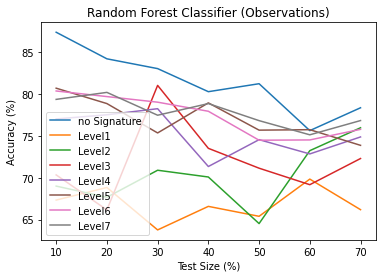

In [197]:
for t in [0,1,2,3,4,5,6,7]:
    p = [index for index, value in enumerate(label) if value == t]
    if(t==0):
        plt.plot([ testSize[i] for i in p],[ accuracy[i] for i in p], label = "no Signature ") 
  
    else:
        plt.plot([ testSize[i] for i in p],[ accuracy[i] for i in p], label = 'Level'+str(t)) 
    

plt.title("Random Forest Classifier (Observations)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Size (%)")
plt.legend() 
plt.show()

In [198]:
label = []
lagging =[]
accuracy =[]

for p in [0,1,2,3,4,5,6,7]:
    for i in [0,1,2,3,4,5]:
        label.append(p)
        lagging.append(i)
        accuracy.append(Train(SignatureLevel=p,testSize=0.2,Lag=i))
        
for i in range(len(accuracy)):
    accuracy[i]=(accuracy[i] * 100)

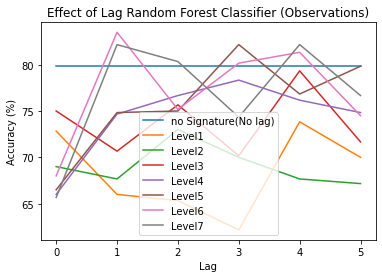

In [199]:



    
for t in [0,1,2,3,4,5,6,7]:
    p = [index for index, value in enumerate(label) if value == t]
    if(t==0):
        plt.plot([ lagging[i] for i in p],[ accuracy[p[0]] ] * len(p), label = "no Signature(No lag)") 
  
    else:
        plt.plot([ lagging[i] for i in p],[ accuracy[i] for i in p], label = 'Level'+str(t)) 
    

plt.title("Effect of Lag Random Forest Classifier (Observations)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Lag")
plt.legend() 
plt.show()

## Estimating using filtered observations

In [200]:
label = []
testSize =[]
accuracy =[]

for p in [0,1,2,3,4,5,6,7]:
    for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
        label.append(p)
        testSize.append(i)
        accuracy.append(Train(SignatureLevel=p,testSize=i,Smoothed=True,Lag=1))
        

for i in range(len(accuracy)):
    accuracy[i]=(accuracy[i] * 100)
for i in range(len(testSize)):
    testSize[i]=(testSize[i] * 100)
    


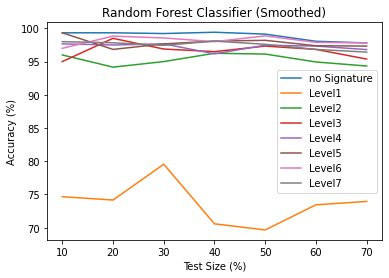

In [201]:
for t in [0,1,2,3,4,5,6,7]:
    p = [index for index, value in enumerate(label) if value == t]
    if(t==0):
        plt.plot([ testSize[i] for i in p],[ accuracy[i] for i in p], label = "no Signature") 

    else:
        plt.plot([ testSize[i] for i in p],[ accuracy[i] for i in p], label = 'Level'+str(t)) 


plt.title("Random Forest Classifier (Smoothed)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Test Size (%)")
plt.legend() 
plt.show()

In [202]:
label = []
lagging =[]
accuracy =[]

for p in [0,3,4,5,6,7]:
    for i in [0,1,2,3,4,5]:
        label.append(p)
        lagging.append(i)
        accuracy.append(Train(SignatureLevel=p,testSize=0.2,Lag=i,Smoothed=True))
        
for i in range(len(accuracy)):
    accuracy[i]=(accuracy[i] * 100)

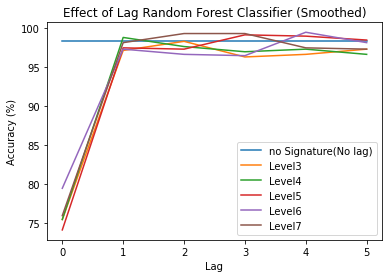

In [203]:
for t in [0,3,4,5,6,7]:
    p = [index for index, value in enumerate(label) if value == t]
    if(t==0):
        plt.plot([ lagging[i] for i in p],[ accuracy[p[0]] ] * len(p), label = "no Signature(No lag)") 
  
    else:
        plt.plot([ lagging[i] for i in p],[ accuracy[i] for i in p], label = 'Level'+str(t)) 
    

plt.title("Effect of Lag Random Forest Classifier (Smoothed)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Lag")
plt.legend() 
plt.show()

# 2D motion Model


In [161]:
observation_variance = 1.2
transition_variance = 0.4


TrueThetas, Observations, ObservationPrediction ,ThetasPredictedMean , ThetasPredictedVar,ThetasPosteriorMean, ThetasPosteriorVar=GeneralKalmanFilter(
    #True Theta
    [1,1,2,3],
    #Transition Matrix
    np.array([[1, 0, 1, 0],[0, 1, 0, 1],[0, 0, 1, 0],[0, 0, 0, 1]]),
    #TransitionNoiseVariance
    transition_variance * np.eye(4),
    #Observation Matrix
    np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]]),
    #ObservationNoiseVariance
    observation_variance * np.eye(2),   
    #priorTheta Mean
    [1,1,3,4],
    #priorTheta Variance
    3* np.eye(4),
    #number of observations
    33              
)


In [187]:
yObs =  [ item.tolist()[0] for item in Observations]

yObs = np.array(yObs)
yObs.shape

(33, 2)

In [188]:
yPred =  [ item.tolist() for item in ObservationPrediction]


yPred = np.array(yPred)

In [190]:
yObs[:,0]

array([0.26975954, 4.76685498])

In [193]:
p = figure(title="Gaussian DLM", x_axis_label="TimeStep", y_axis_label="Position (ie yk)")
p.line(yPred[:,1],yPred[:,0], legend_label="Positions Predicted", color="green")
p.line(yObs[:,1],yObs[:,0], legend_label="Observed Positions", color="red" )
show(p) 


(4,)

In [36]:

print(a)

[[1 0 0 0]
 [0 1 0 0]]
[[1 1 2 3]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)